<a href="https://colab.research.google.com/github/ThakdanaiSaelee/Assignment_CE888/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import math

**Mobile Price Classification Dataset**

In [3]:
# load data from github
df_mobile = pd.read_csv('https://raw.githubusercontent.com/ThakdanaiSaelee/Assignment_CE888/main/mobile_price_classification.csv')
df_mobile.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df_mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
# checking output values
df_mobile['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [6]:
# group output value to binaty classification 0 and 1 cobine to 0 (low price), 2 and 3 combine to 1 (high price)
label = {"price_range": {1:0, 2:1, 3:1}
         }
df_mobile.replace(label, inplace=True)
df_mobile['price_range'].value_counts()

0    1000
1    1000
Name: price_range, dtype: int64

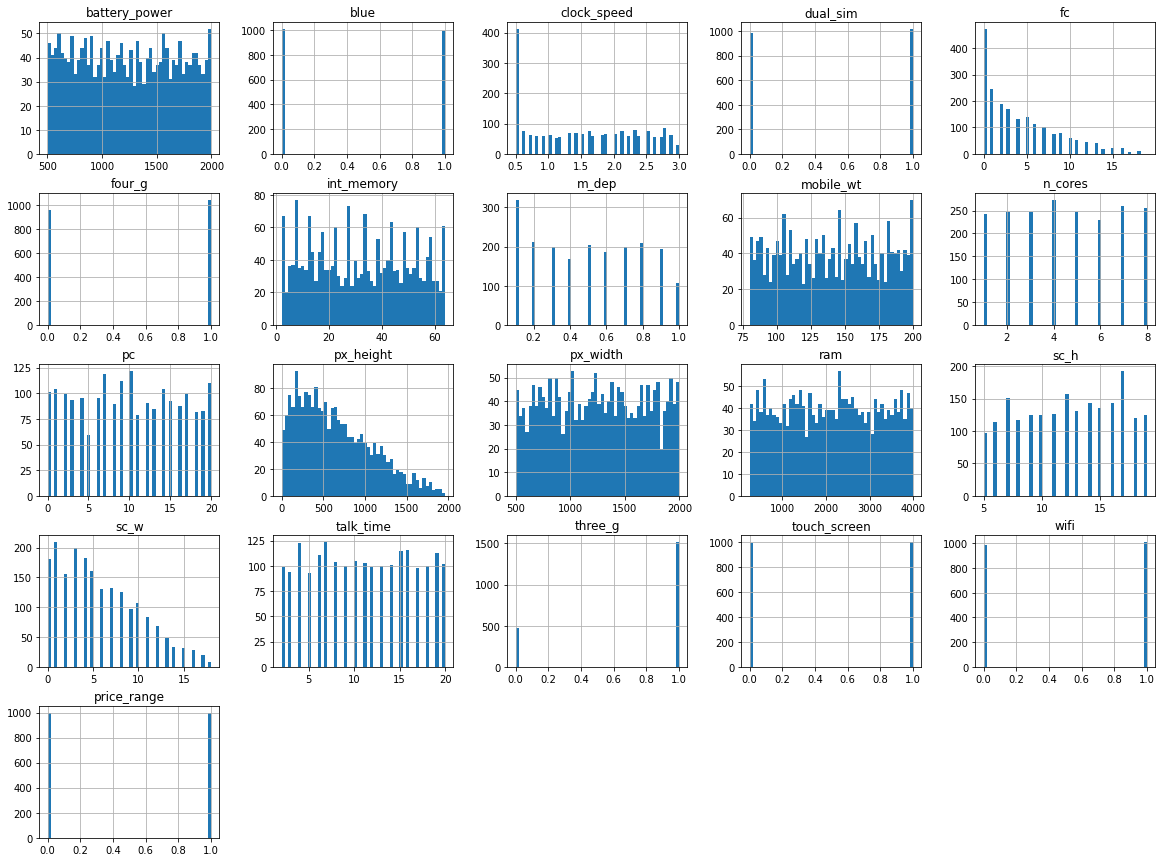

In [7]:
_ = df_mobile.hist(bins=50, figsize=(20,15))

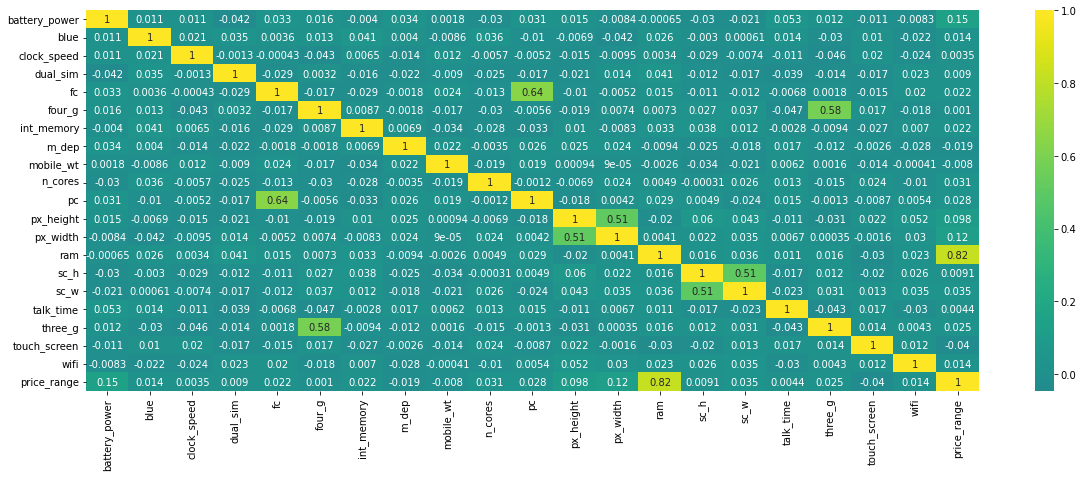

In [48]:
# Calculate the correlations and plot a heatmap
correlations = df_mobile.corr()
f, ax = plt.subplots(figsize=(20, 7))
ax = sns.heatmap(correlations, annot=True, center=0,  cmap="viridis")

Look like ram has correlated with price

Make the data imbalance

In [34]:
# create function to split the data
def make_imbalance(df, column_name, proportion):
  df = df.sort_values(by=[column_name], ascending=True) # sort the data by class
  class0, class1 = df[column_name].value_counts()
  row = math.floor((class0*100)/proportion)
  return df.head(row)                                   # return the top of data frame by proportion

In [36]:
# create low inbalance 65%
df_mobile_65 = make_imbalance(df_mobile, 'price_range', 65)
df_mobile_65['price_range'].value_counts()

0    1000
1     538
Name: price_range, dtype: int64

In [37]:
# create low inbalance 75%
df_mobile_75 = make_imbalance(df_mobile, 'price_range', 75)
df_mobile_75['price_range'].value_counts()

0    1000
1     333
Name: price_range, dtype: int64

In [38]:
# create low inbalance 90%
df_mobile_90 = make_imbalance(df_mobile, 'price_range', 90)
df_mobile_90['price_range'].value_counts()

0    1000
1     111
Name: price_range, dtype: int64